# Labooratorio 3 -- Arrays y analisis de datos

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random

## Parte 1

Problema 1: ¿Cuál es el tamaño en bytes de un array de 1000

In [2]:
a = np.zeros(1000)
print(f"El array tiene tamaño de {a.nbytes} bytes")

El array tiene tamaño de 8000 bytes


Problema 2: Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [4]:
np.arange(100, 0, -2)[-10:]

array([100,  98,  96,  94,  92,  90,  88,  86,  84,  82,  80,  78,  76,
        74,  72,  70,  68,  66,  64,  62,  60,  58,  56,  54,  52,  50,
        48,  46,  44,  42,  40,  38,  36,  34,  32,  30,  28,  26,  24,
        22,  20,  18,  16,  14,  12,  10,   8,   6,   4,   2])

Problema 3: Dado el array: 2456 0374 8852 1561. Seleccione con una instrucción el subarray de elementos 0374. Después, seleccione el subarray de elementos 25 85

In [7]:
a = np.array([2, 4, 5, 6, 0, 3, 7, 4, 8, 8, 5, 2, 1, 5, 6, 1])

print('Primer subarray: ', a[4:8])
print('Sgundo subarray: ', a[[0, 2, 8, 10]])



Primer subarray:  [0 3 7 4]
Sgundo subarray:  [2 5 8 5]


Problema 4: Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b)

In [8]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

print(f"La media aritmetica de la diferencia es: {np.mean(a - b)}")

La media aritmetica de la diferencia es: -0.25


Problema 5:  Tengo valores de cordenadas (x, y) en las columnas
- 1.33 4.5
- 30.0 10.7
- 70.2 0.5  
del array. Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.

In [10]:
a = np.array([[1.33, 4.5],
                [30.0, 10.7],
                [70.2, 0.5]])

cords = np.array([37.1, -3.6])
a = np.vstack([a, cords])
print('las dimensiones del array son: ', a.shape)

las dimensiones del array son:  (4, 2)


Problema 6: Copie el array del ejercicio anterior. Traspóngalo. Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0)

In [11]:
a = np.array([[1.33, 4.5],
                [30.0, 10.7],
                [70.2, 0.5]])
cords = np.array([[10.8, 35.8],
                     [3.0, 12.0]])
new_a = np.hstack([a.T, cords])
print('Dimensiones del nuevo array: ', new_a.shape)
print('arrey nuevo: ', new_a)

Dimensiones del nuevo array:  (2, 5)
arrey nuevo:  [[ 1.33 30.   70.2  10.8  35.8 ]
 [ 4.5  10.7   0.5   3.   12.  ]]


## Parte 2: Exploracion de data

In [15]:
df = pd.read_csv("NucleosPoblacion.csv")
df

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873
...,...,...,...,...,...,...,...,...,...,...
847,847,848,Infante Juan Manuel,14192.0,30030,Murcia,30,Murcia,-1.124304,37.979033
848,848,849,Santa Maria de Gracia,13349.0,30030,Murcia,30,Murcia,-1.202069,37.984024
849,849,850,Vista Alegre,15208.0,30030,Murcia,30,Murcia,-1.130564,37.995715
850,850,851,Poligono Sta M de Benquerencia,19177.0,45168,Toledo,45,Toledo,-3.948364,39.866699


Problema 1: ¿Cuántos Municipios tienen más de 10,0000 habitantes?
 

In [16]:
top_10 = df.query('Poblacion > 10000')["CodMun"].unique()
print(f"Hay {len(top_10)} municipios con más de 10,000 habitantes.")

Hay 752 municipios con más de 10,000 habitantes.


Problema 2: Realice una gráfica de barras sobre la Población de cada ciudad, ordenela de menor a mayor y responda:
- ¿Cuál es la segunda ciudad más poblada?
- ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

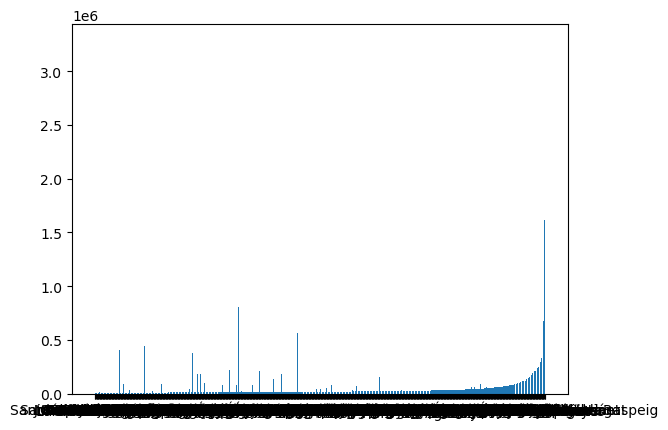

La segunda ciudad más poblada es Barcelona.
Granada está en la posición 273 en el ranking de ciudades más pobladas.


In [18]:
df_sort = df.sort_values("Poblacion")
plt.bar(df_sort["Municipio"], df_sort["Poblacion"])
plt.show()

top2 = df_sort.iloc[-2]["Municipio"]
print(f"La segunda ciudad más poblada es {top2}.")

granada = df_sort.query('Municipio == "Granada"').index[0] + 1
print(f"Granada está en la posición {granada} en el ranking de ciudades más pobladas.")

Problema 3: ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?

In [19]:
df.query('Municipio == "Extremadura"')
# La base de datos no tiene municipio Extremadura

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y


Problema 4: ¿Cuál es el municipio situado más al Norte? Usar el valor de la coordenada "Y" que representa la latitud en grados. Proporcione también la provincia a la que pertenece y su población.

In [21]:
# Mostrar el primer registro del dataframe ordenado (que corresponderá al municipio más al Norte)
nort_muni = df.sort_values("Y").iloc[-1]
print(f" El municipio mas situado al norte es: {nort_muni['Municipio']}, de provincia: {nort_muni['Provincia']}, con poblacion de: {nort_muni['Poblacion']} habitantes.")


 El municipio mas situado al norte es: Viveiro, de provincia: Lugo, con poblacion de: 16211.0 habitantes.


Problema 5: Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada

In [27]:
granada_df = df[df["Provincia"] == "Granada"]['Poblacion'].describe()
granada_df['median'] = df[df["Provincia"] == "Granada"]['Poblacion'].median()
granada_df[['mean', 'std', 'min', 'max', 'median']]


mean       30217.850000
std        50355.491715
min        10386.000000
max       239154.000000
median     17526.000000
Name: Poblacion, dtype: float64

Problema 6: Realice un histograma con la población de los Municipios para cada una de las provincias.

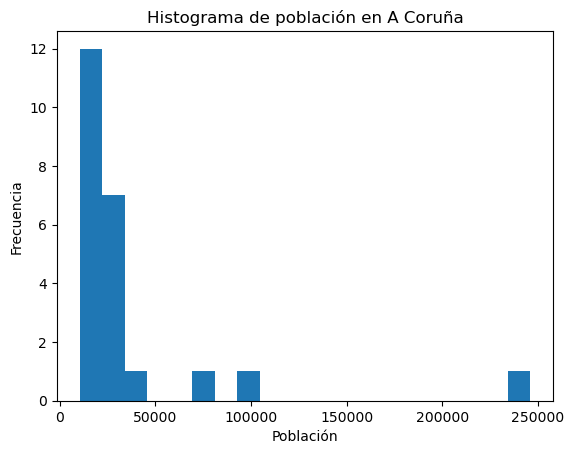

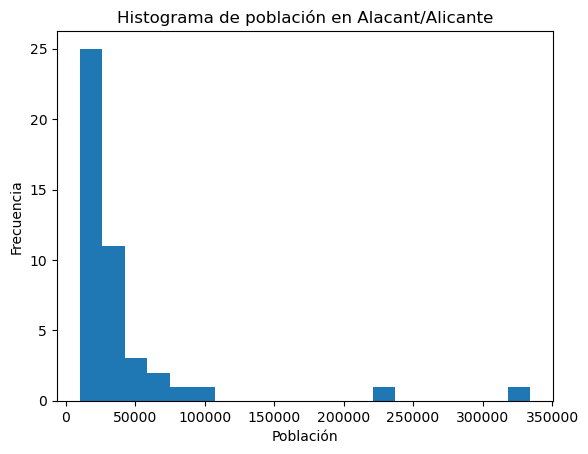

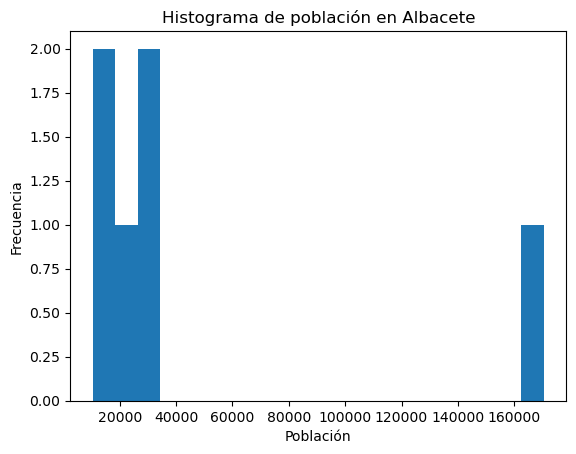

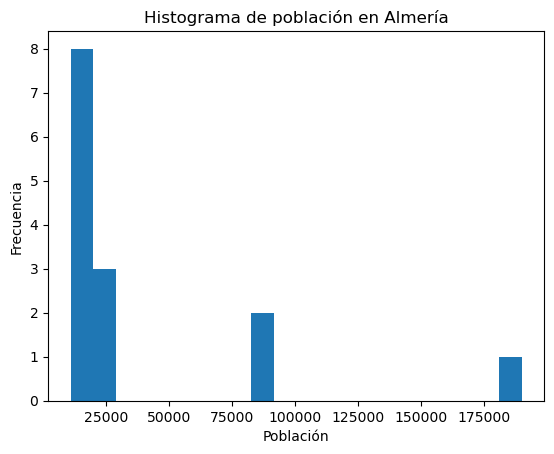

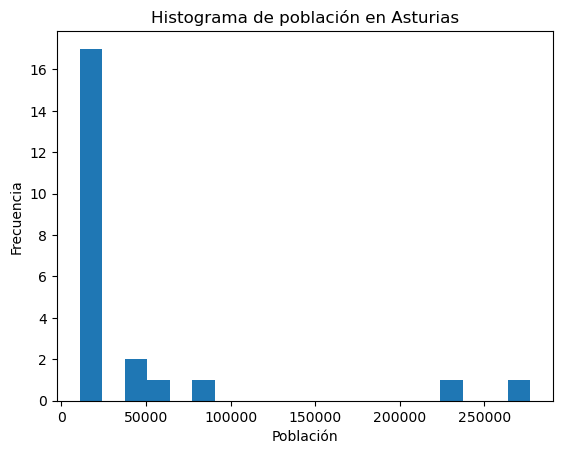

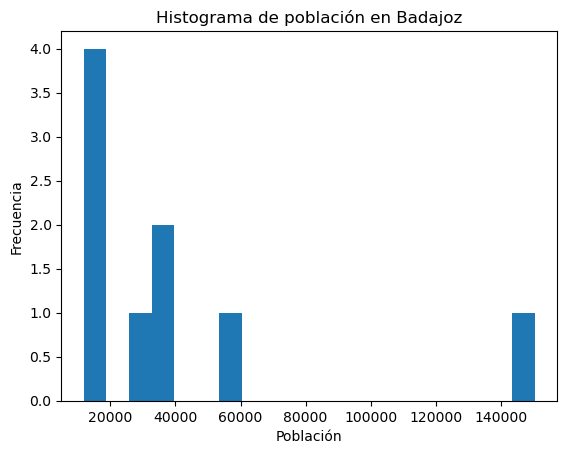

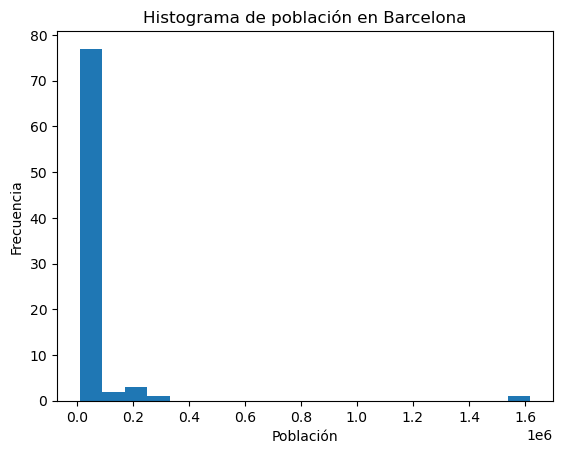

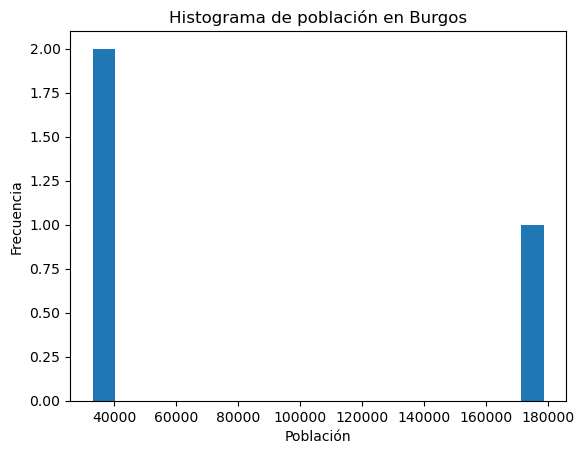

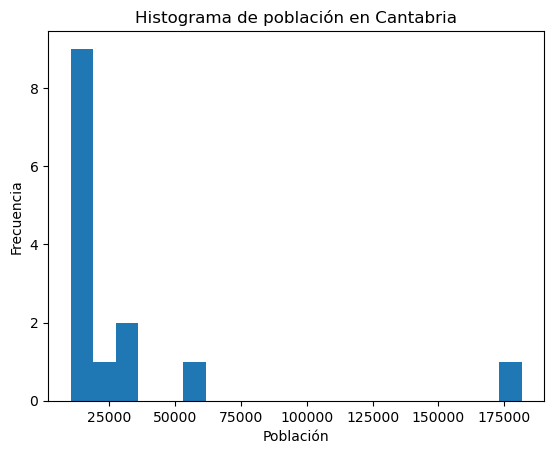

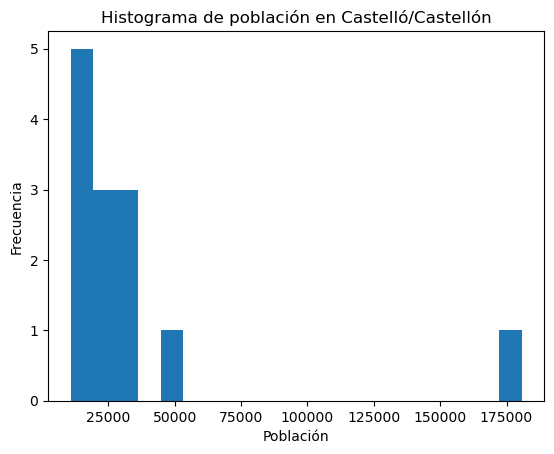

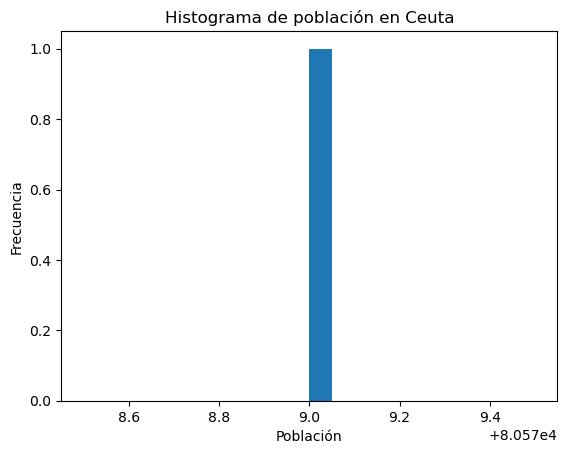

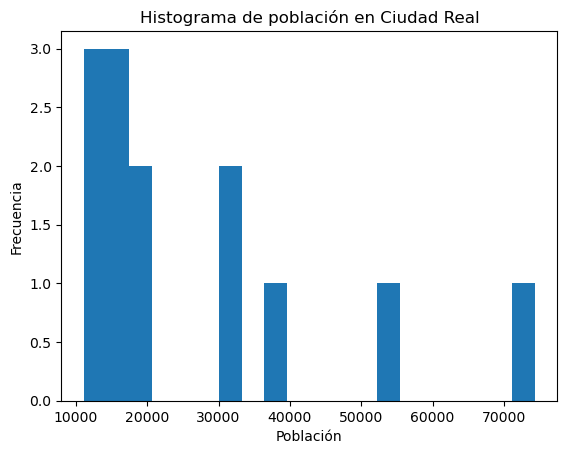

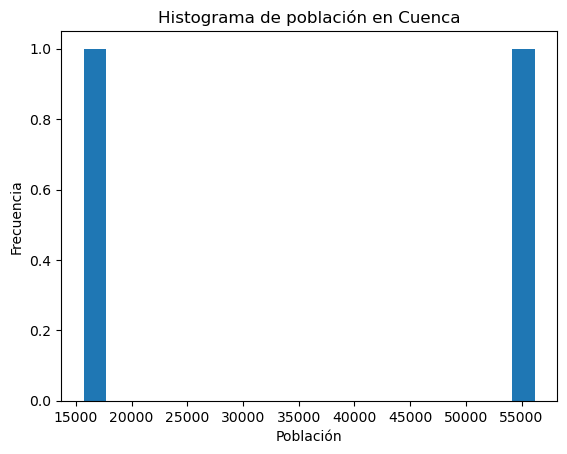

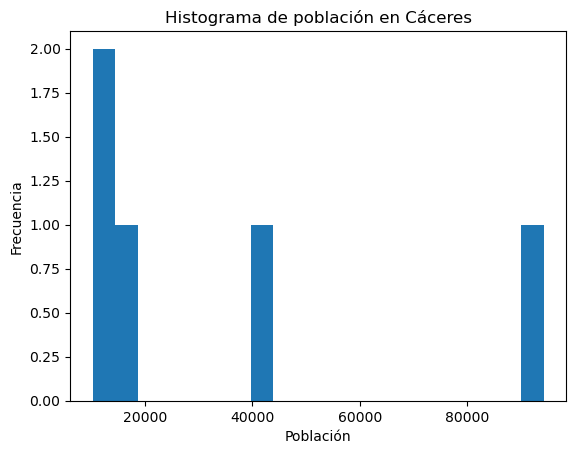

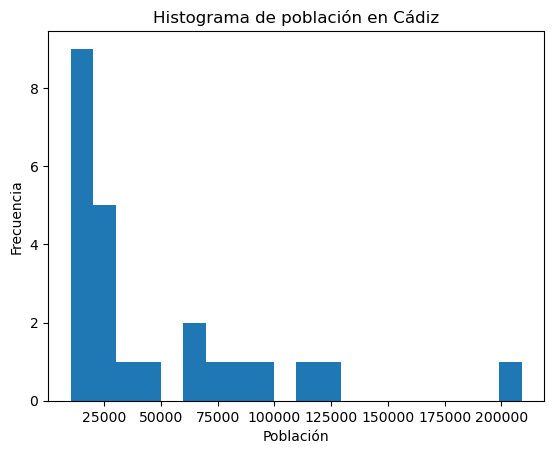

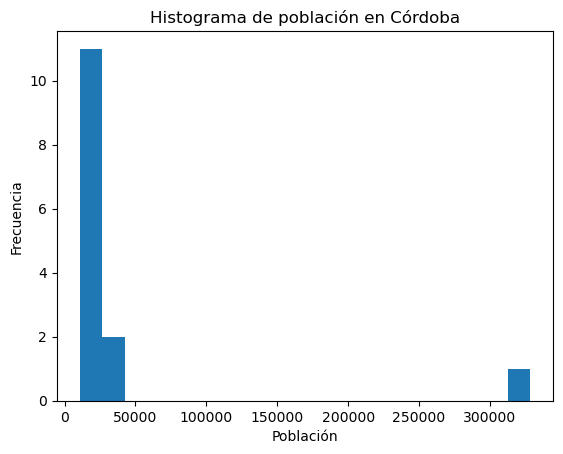

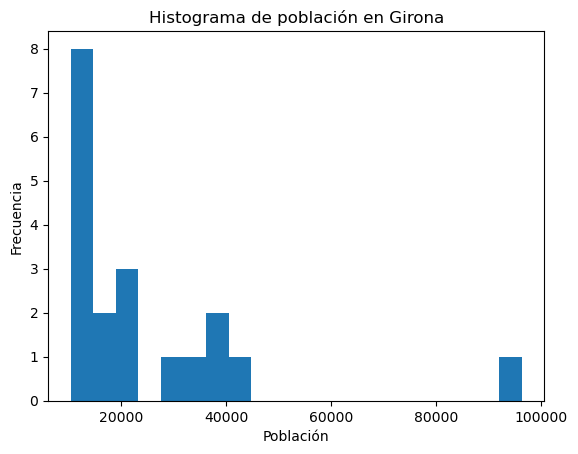

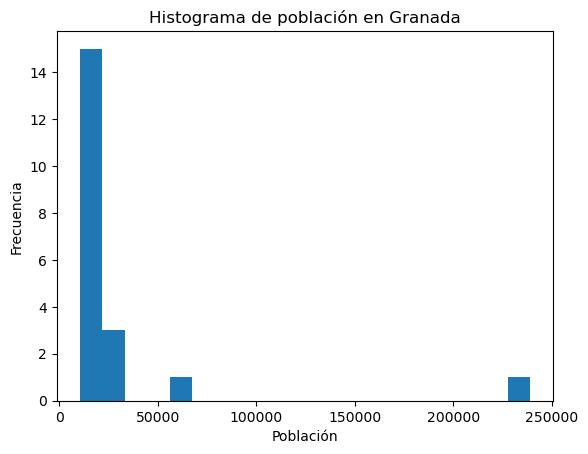

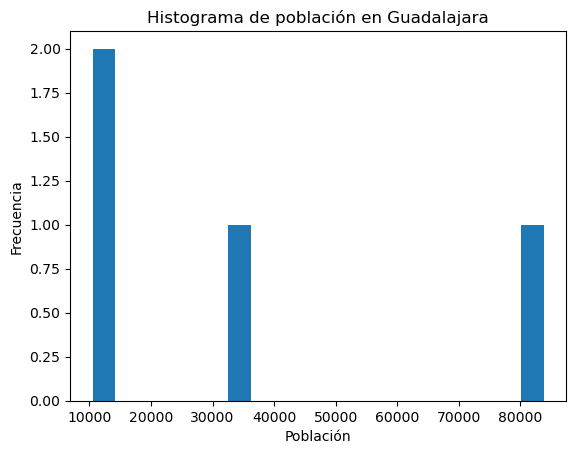

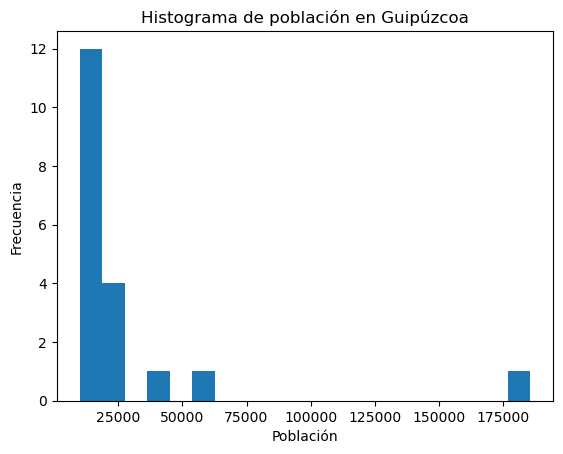

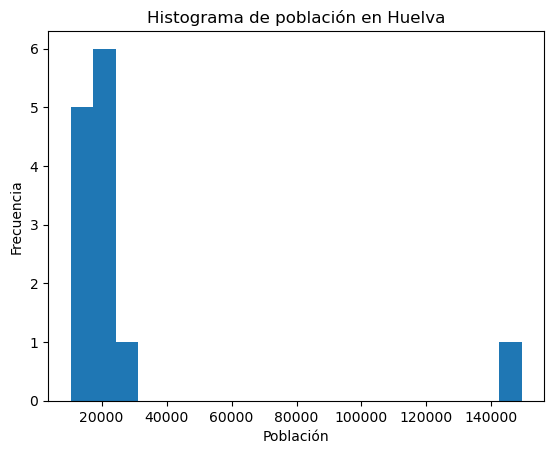

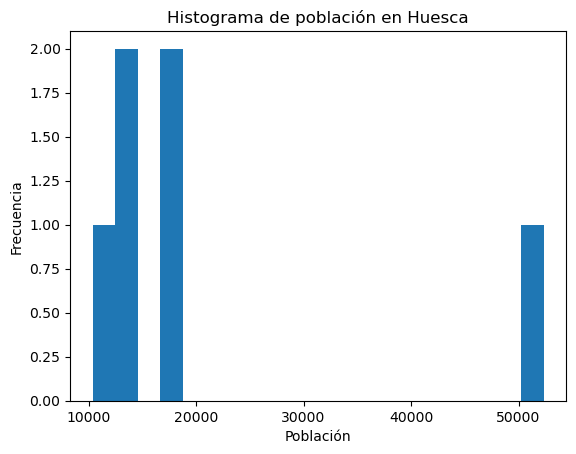

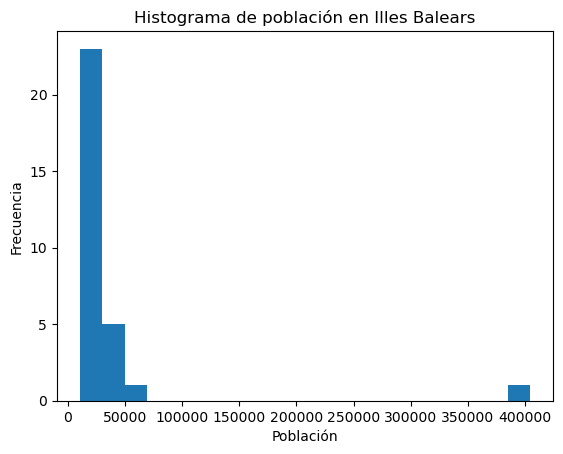

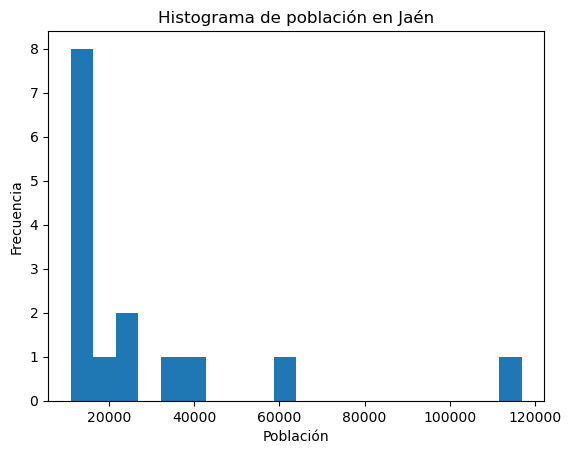

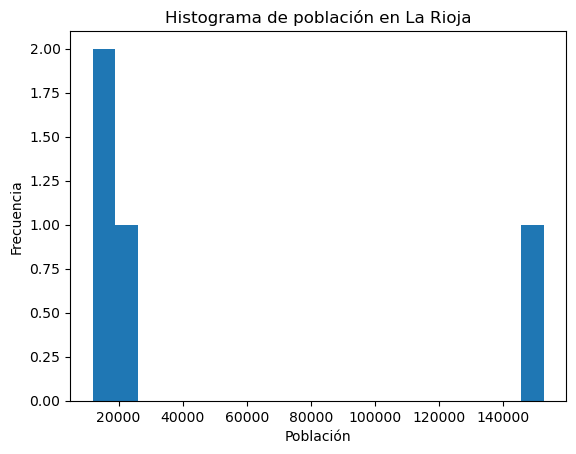

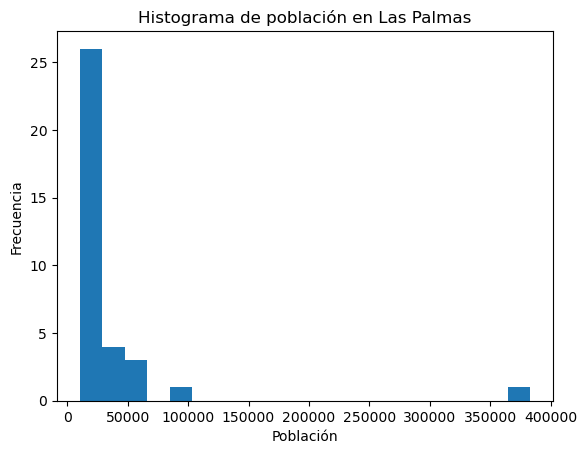

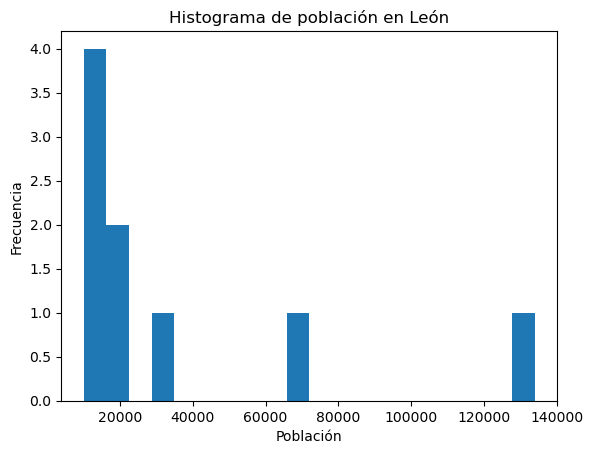

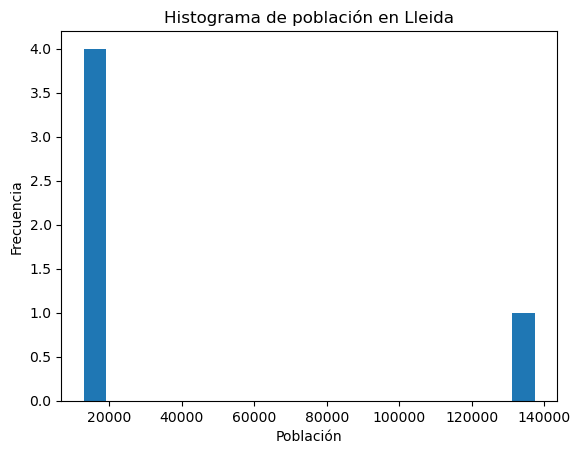

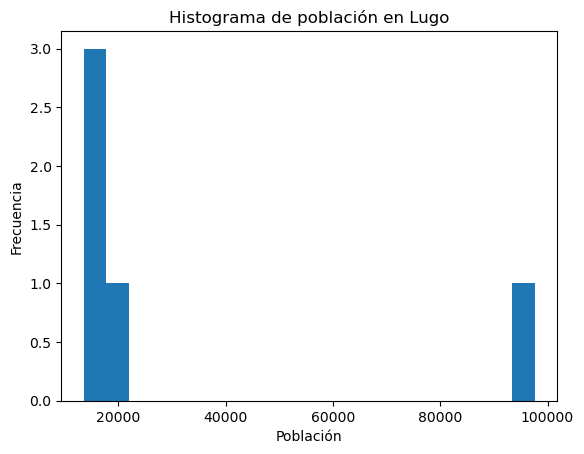

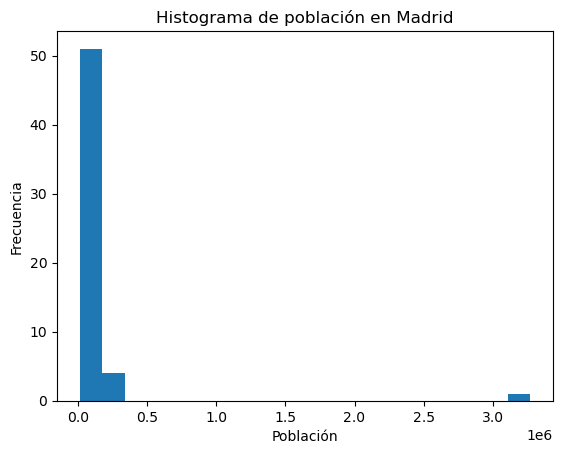

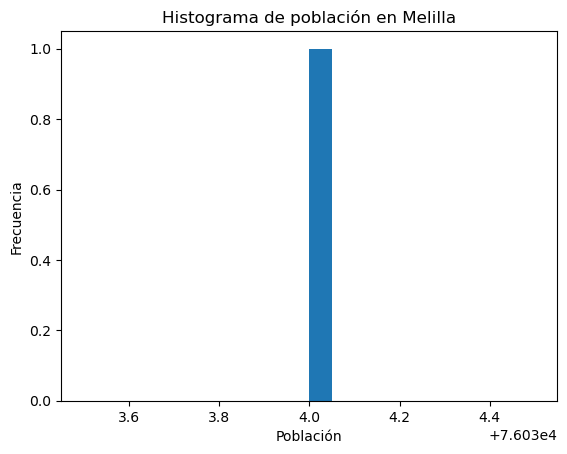

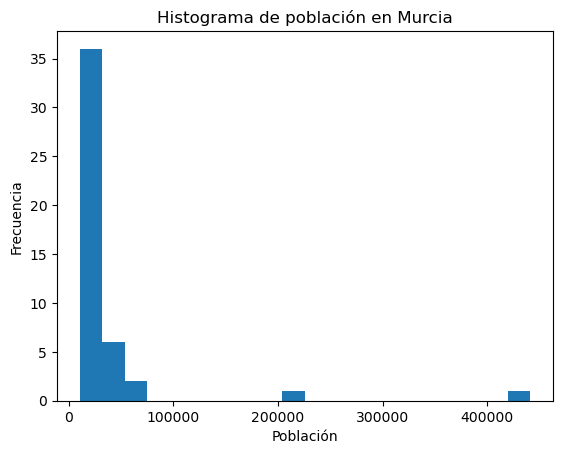

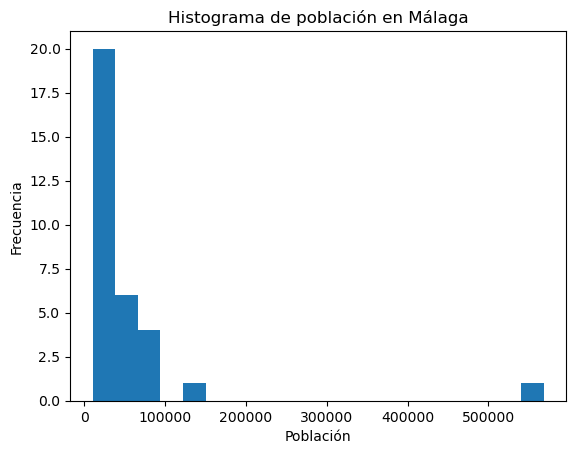

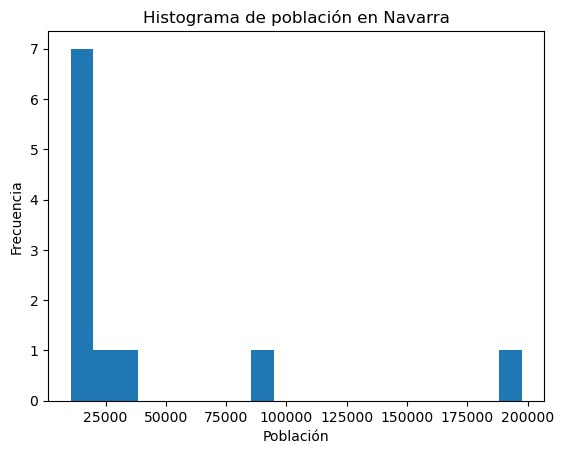

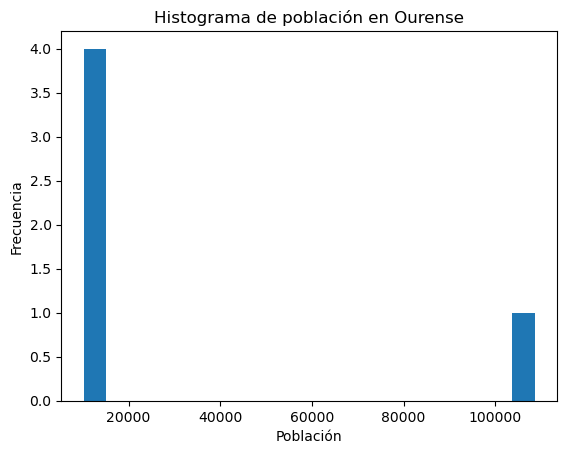

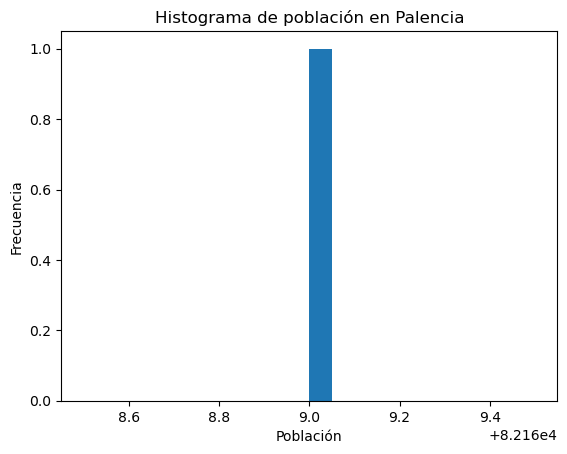

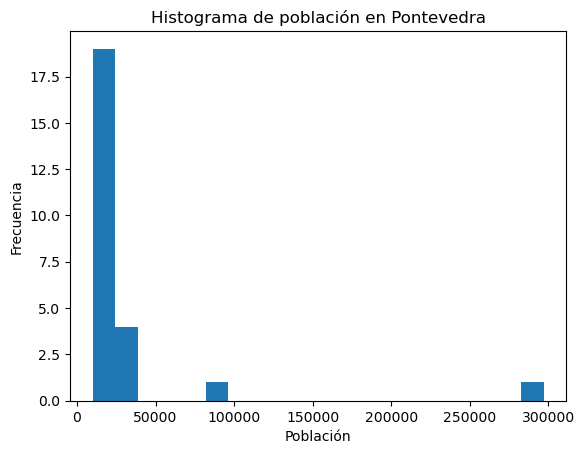

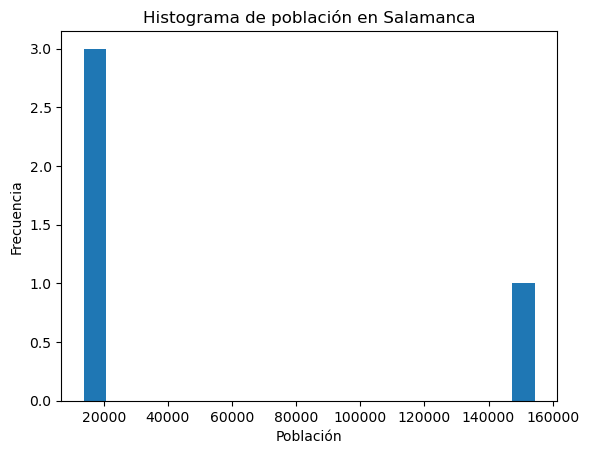

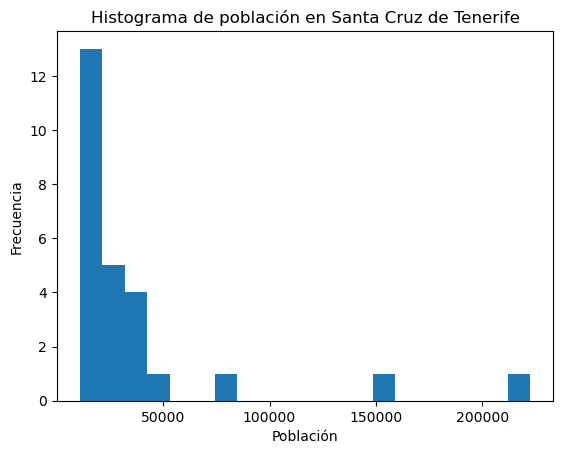

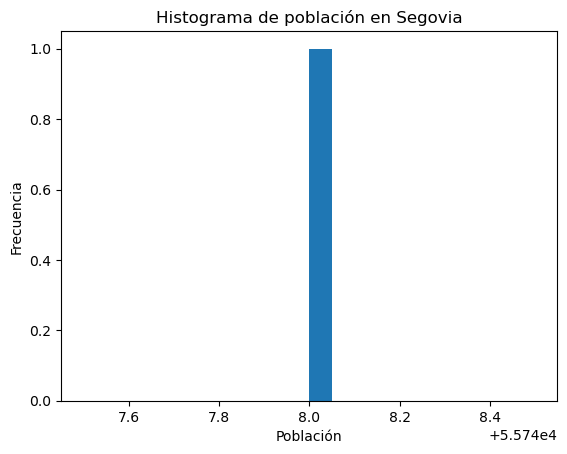

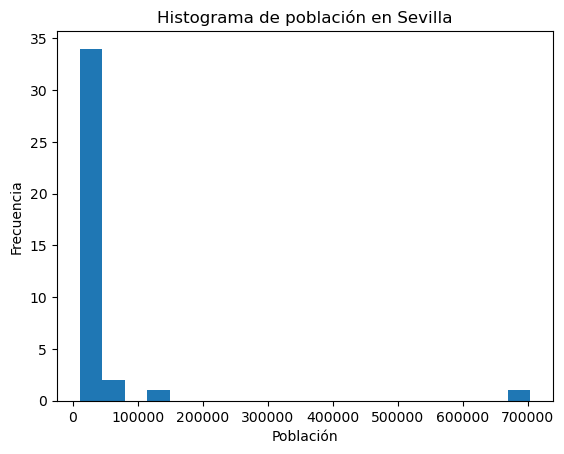

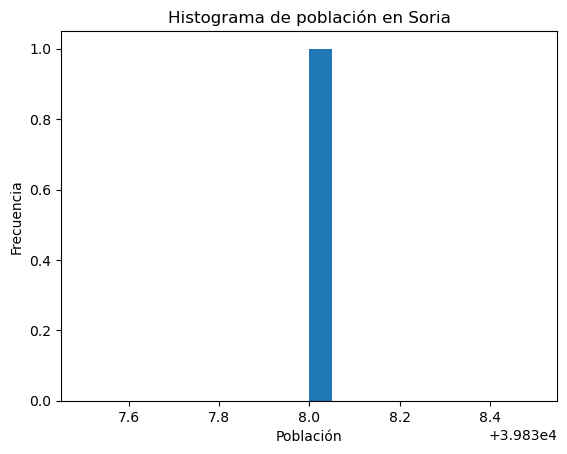

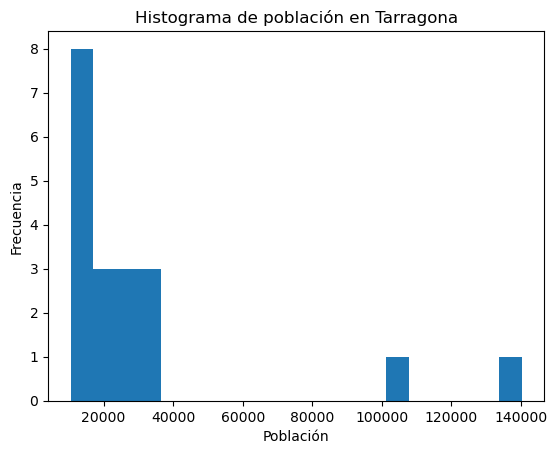

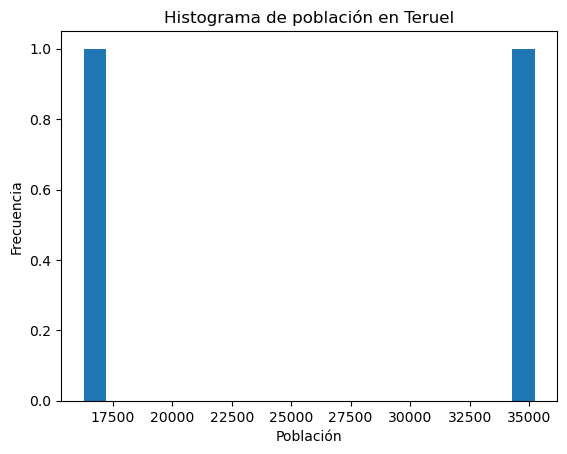

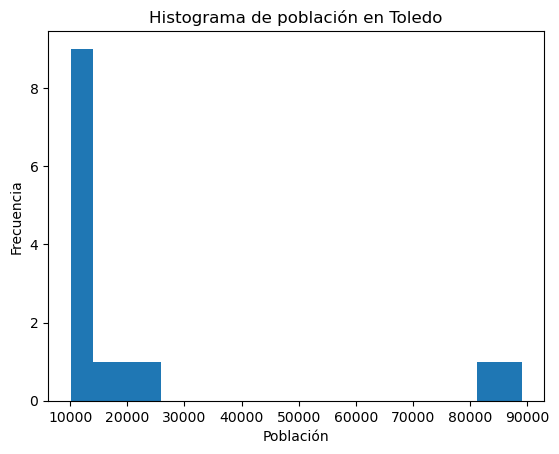

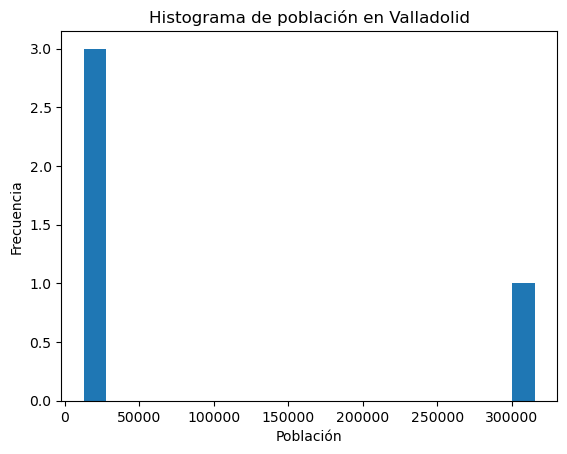

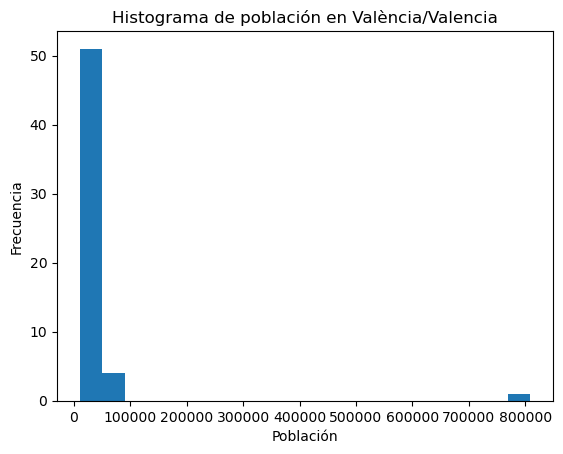

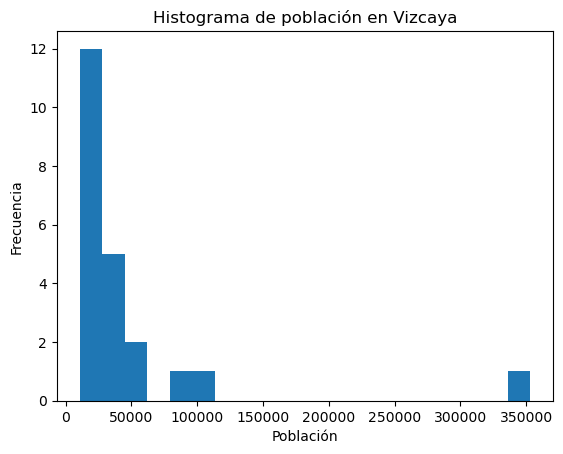

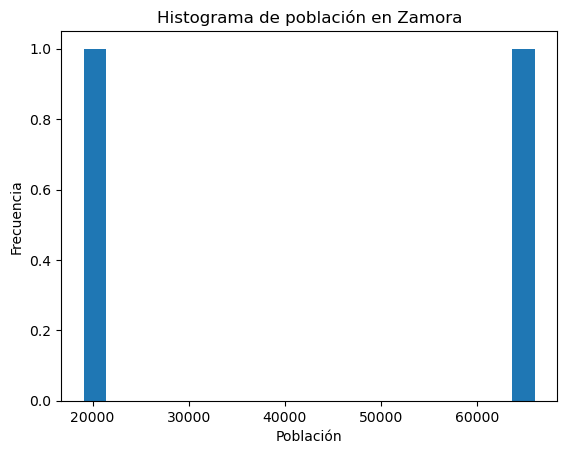

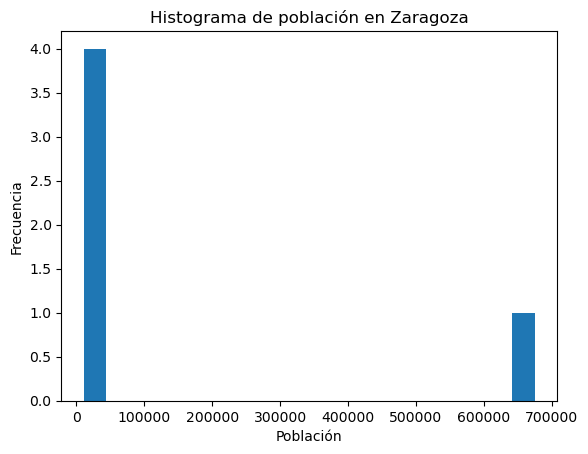

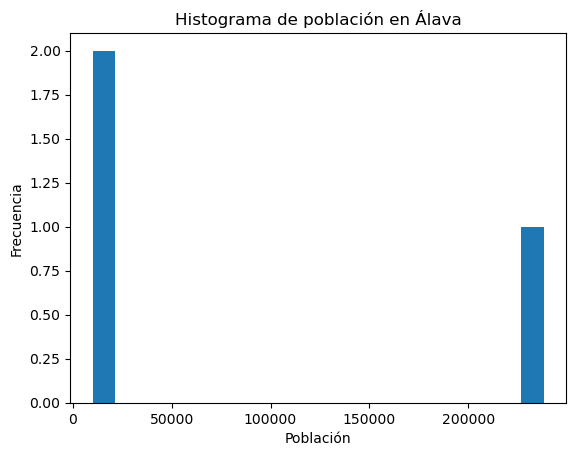

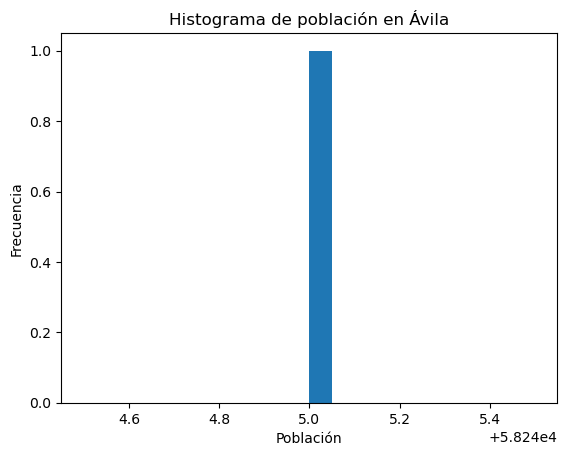

In [28]:
for provincia, datos_provincia in df.groupby("Provincia"):
    plt.hist(datos_provincia["Poblacion"], bins=20)
    plt.title(f"Histograma de población en {provincia}")
    plt.xlabel("Población")
    plt.ylabel("Frecuencia")
    plt.show()

Problema 7: Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?

In [30]:
municipios_aleatorios = random.sample(list(df["Municipio"].unique()), 50)

data_munis = df[df["Municipio"].isin(municipios_aleatorios)]
# Se calcula el promedio, la desviación estandar de los 50 municipios seleccionados al azar
promedio_poblacion = np.mean(data_munis["Poblacion"])
desviacion_estandar_poblacion = np.std(data_munis["Poblacion"])
print(f"Promedio de población de los 50 municipios seleccionados: {promedio_poblacion:.2f}")
print(f"Desviación estándar de la población de los 50 municipios seleccionados: {desviacion_estandar_poblacion:.2f}")


Promedio de población de los 50 municipios seleccionados: 43880.57
Desviación estándar de la población de los 50 municipios seleccionados: 59097.71


Problema 8: Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [38]:
x

-3.703797076

In [43]:
# Suponiendo que se refiere al municipio de Madrid
x, y = df.query('Municipio == "Madrid"')[['X', 'Y']].values[0]

distances = np.sqrt((df['X'] - x)**2 + (df['Y'] - y)**2)

mas_cerca = distances[distances > 0].argmin()
mas_lejos = distances.argmax()

muni_cerca = df.loc[mas_cerca, 'Municipio']
muni_lejos = df.loc[mas_lejos, 'Municipio']

print(f"El municipio más cercano a Madrid es: {muni_cerca}")
print(f"El municipio más lejano a Madrid es: {muni_lejos}")

El municipio más cercano a Madrid es: Móstoles
El municipio más lejano a Madrid es: Los Llanos de Aridane
